# Ahmet Emre Usta

## 2200765036


# Necessary Imports


In [14]:
import os
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

warnings.filterwarnings("ignore")

In [15]:
working_dir = "/".join(os.getcwd().split("/")[:-1])
DATASETS_PATH = os.path.join(working_dir, "datasets")
RAW_DATASET_PATH = os.path.join(DATASETS_PATH, "raw")
RAW_DATASET = os.path.join(RAW_DATASET_PATH, "data.csv")

# EDA


In [16]:
df = pd.read_csv(RAW_DATASET, sep=";")
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [18]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
dtype: int64

In [19]:
df.dropna(inplace=True)

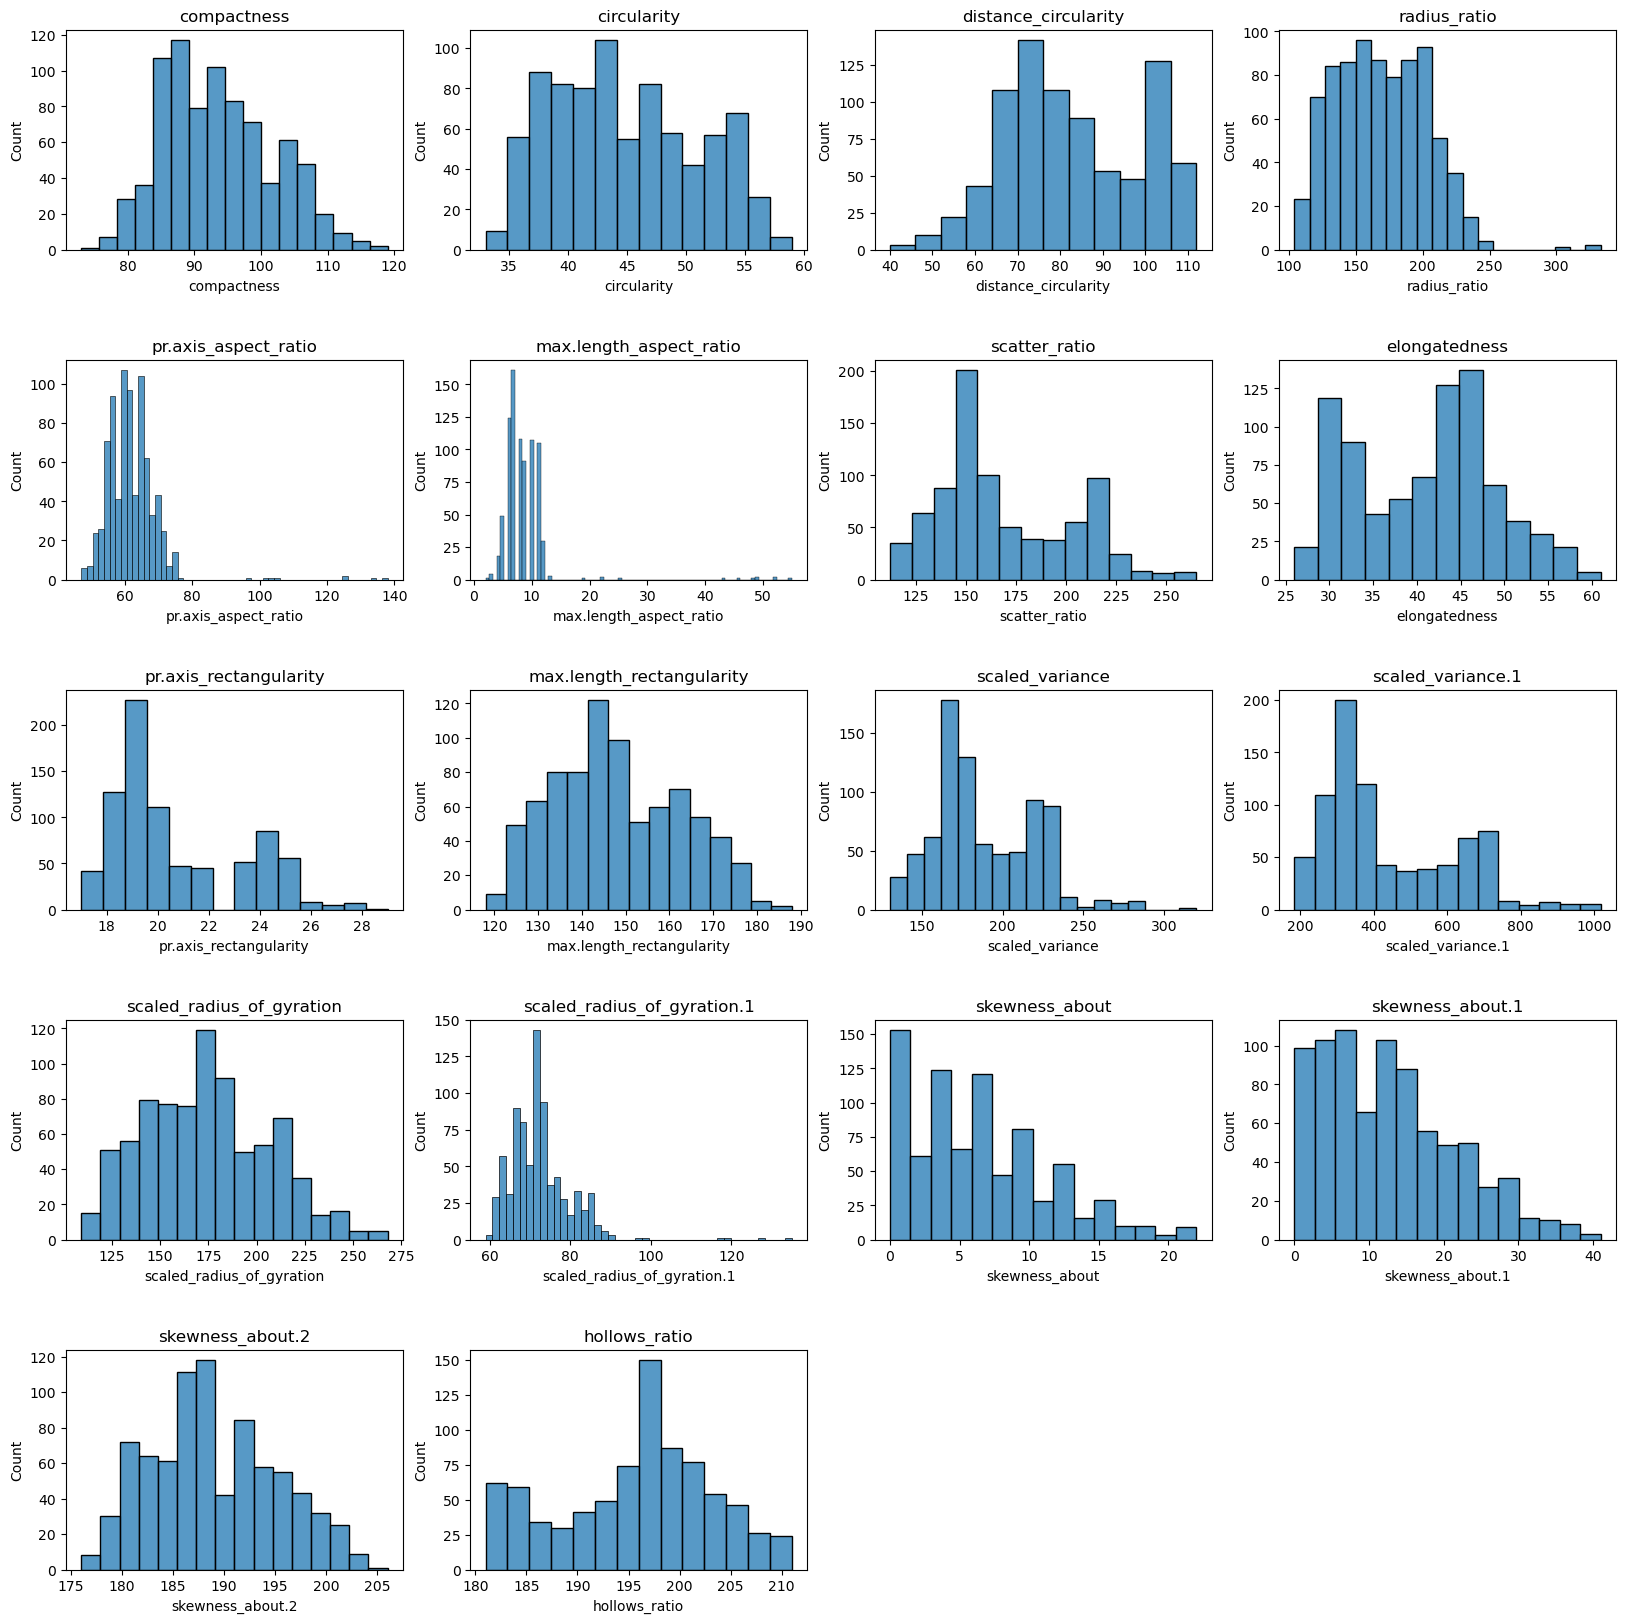

In [20]:
fig = plt.figure(figsize=(20, 20))

for i, col in enumerate(df.columns):
    plt.subplot(5, 4, i + 1)
    sns.histplot(df[col])
    plt.title(col)

plt.subplots_adjust(hspace=0.5)
plt.show()

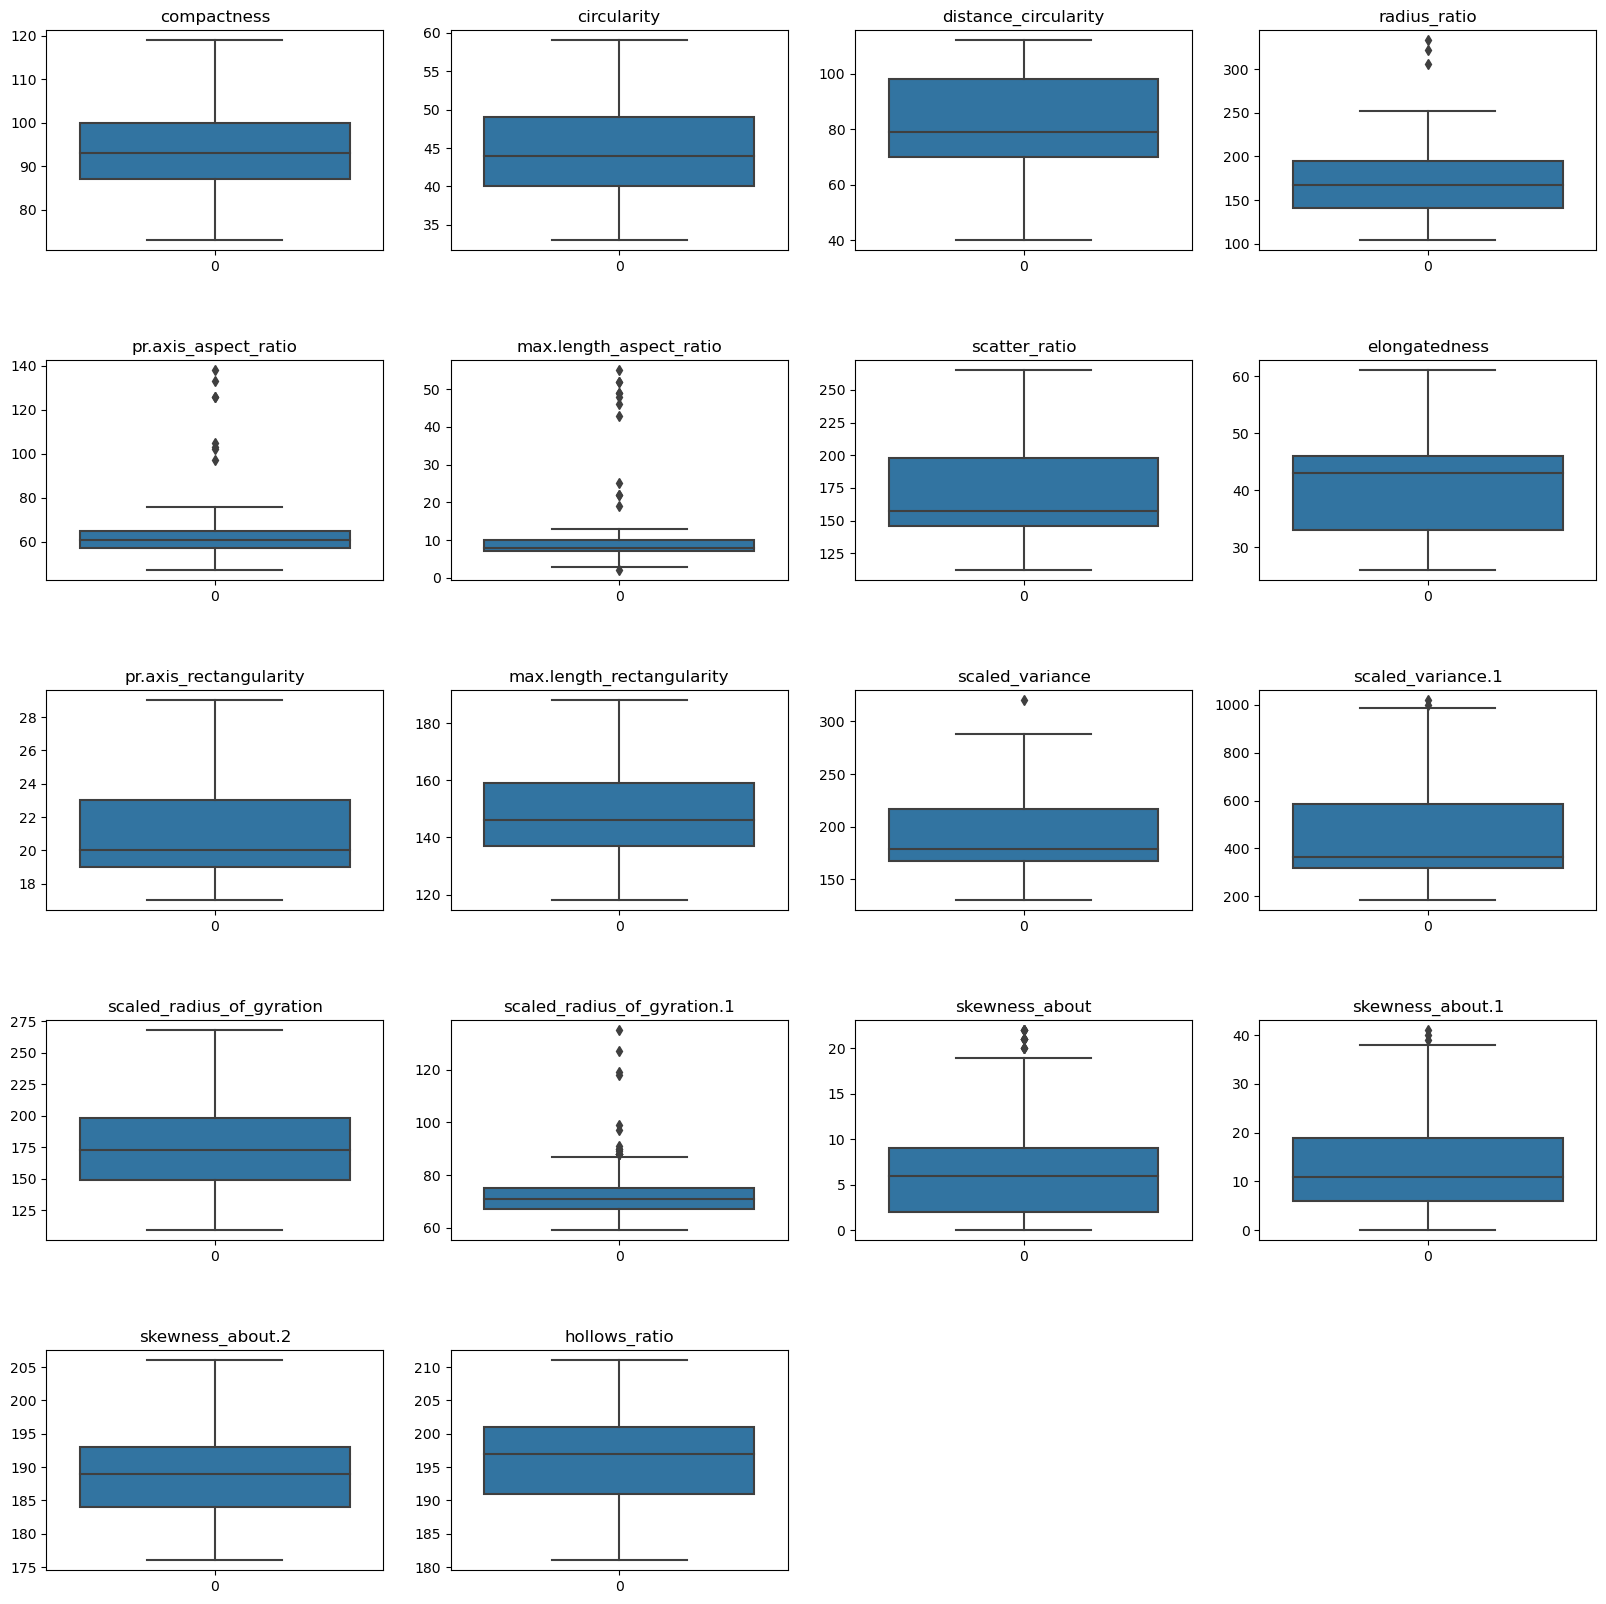

In [21]:
fig = plt.figure(figsize=(20, 20))

for i, col in enumerate(df.columns):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(df[col])
    plt.title(col)

plt.subplots_adjust(hspace=0.5)
plt.show()

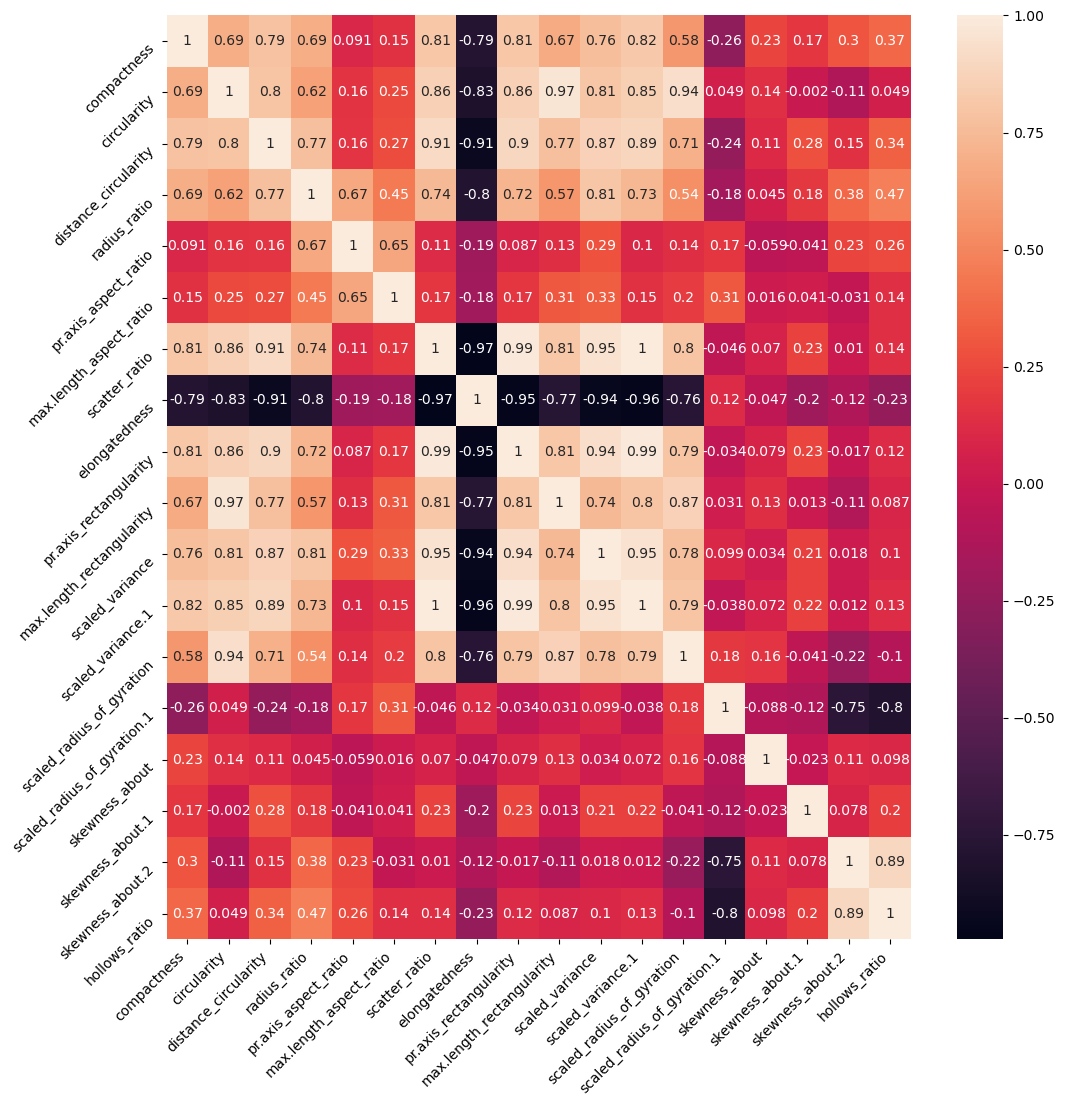

In [22]:
fig = plt.figure(figsize=(12, 12))

correlation = df.corr()

# plt.figure(figsize=(6, 6))
sns.heatmap(correlation, annot=True, cbar=True)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45, va="top")

plt.show()

# KMeans


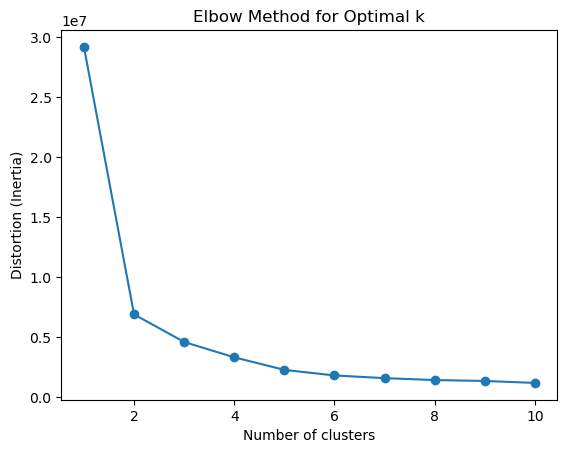

In [23]:
# Elbow Method to determine the optimal number of clusters
def find_optimal_clusters(data, max_k):
    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    # Plot the elbow
    plt.plot(range(1, max_k + 1), distortions, marker="o")
    plt.xlabel("Number of clusters")
    plt.ylabel("Distortion (Inertia)")
    plt.title("Elbow Method for Optimal k")
    plt.show()


# Set the maximum number of clusters to test
max_clusters = 10  # You can adjust this

# Call the function to find the optimal number of clusters
find_optimal_clusters(df, max_clusters)

In [28]:
# Choose the optimal number of clusters based on the elbow plot
optimal_clusters = 4  # Adjust based on the plot

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df["cluster"] = kmeans.fit_predict(df)

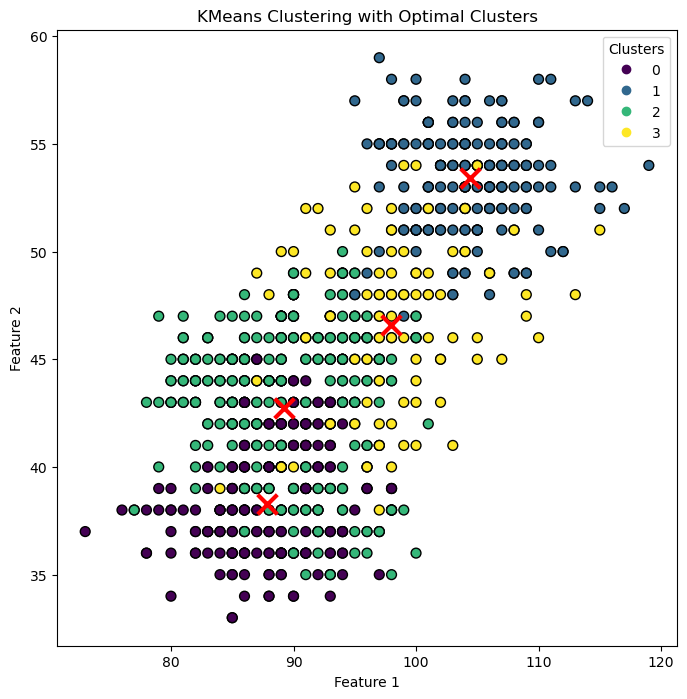

In [29]:
X = df.values

fig = plt.figure(figsize=(8, 8))

# Visualize the clusters with a scatter plot
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    c=df["cluster"],
    cmap="viridis",
    edgecolor="k",
    s=50,
    label="Cluster",
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker="x",
    s=200,
    linewidths=3,
    color="r",
    label="Centroid",
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KMeans Clustering with Optimal Clusters")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

# Agglomerative Clustering


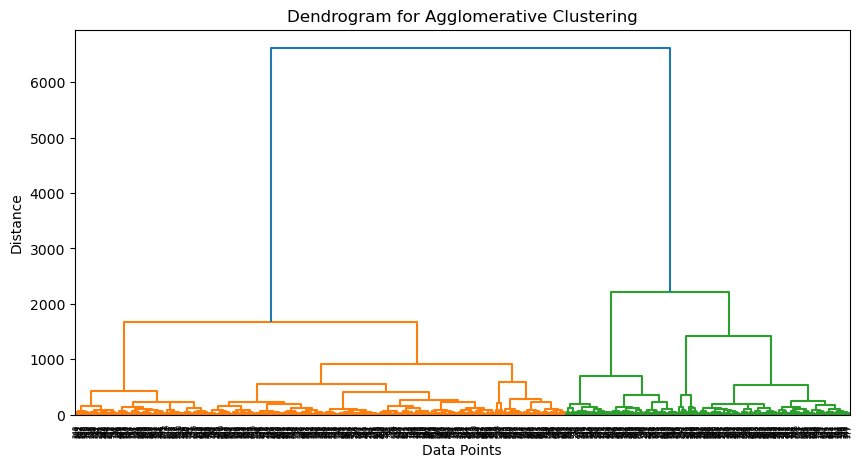

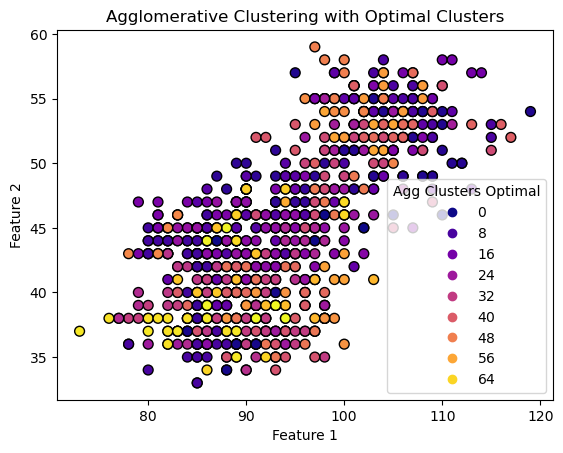

In [33]:
# Calculate linkage matrix
linkage_matrix = linkage(X, method="ward")

# Plot the dendrogram to determine optimal number of clusters
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Identify the optimal number of clusters from the dendrogram
# Look for the largest vertical distance that doesn't intersect any horizontal line
# Set 't' to that vertical distance
t = 80  # Adjust as needed

# Apply Agglomerative Clustering with the optimal number of clusters
agg_clustering_optimal = AgglomerativeClustering(distance_threshold=t, n_clusters=None)
df["agg_cluster_optimal"] = agg_clustering_optimal.fit_predict(X)

# Visualize the clusters with a scatter plot
scatter_agg_optimal = plt.scatter(
    X[:, 0],
    X[:, 1],
    c=df["agg_cluster_optimal"],
    cmap="plasma",
    edgecolor="k",
    s=50,
    label="Agg Cluster Optimal",
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Agglomerative Clustering with Optimal Clusters")
plt.legend(*scatter_agg_optimal.legend_elements(), title="Agg Clusters Optimal")
plt.show()

In [31]:
# Choose the desired number of clusters
num_clusters = 5  # Adjust as needed

# Apply Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
df["agg_cluster"] = agg_clustering.fit_predict(X)

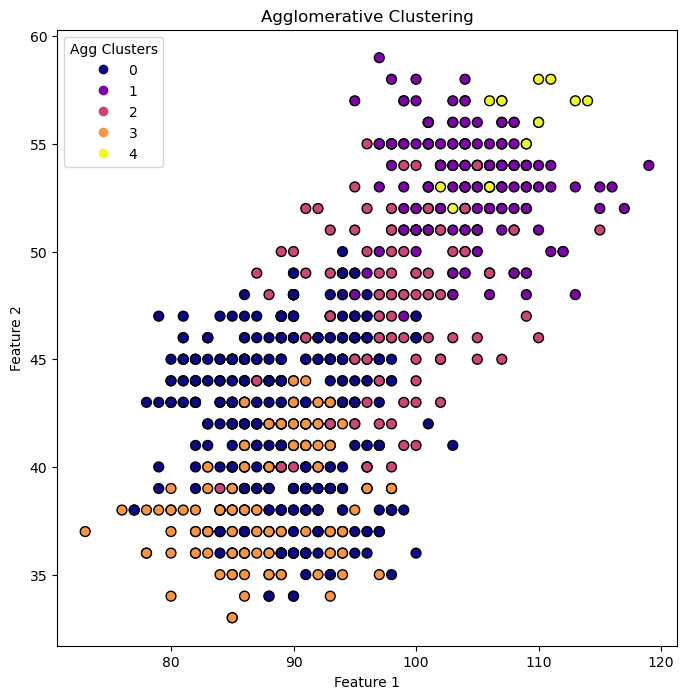

In [32]:
fig = plt.figure(figsize=(8, 8))

# Visualize the clusters with a scatter plot
scatter_agg = plt.scatter(
    X[:, 0],
    X[:, 1],
    c=df["agg_cluster"],
    cmap="plasma",
    edgecolor="k",
    s=50,
    label="Agg Cluster",
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Agglomerative Clustering")
plt.legend(*scatter_agg.legend_elements(), title="Agg Clusters")
plt.show()

# Gaussian Mixture


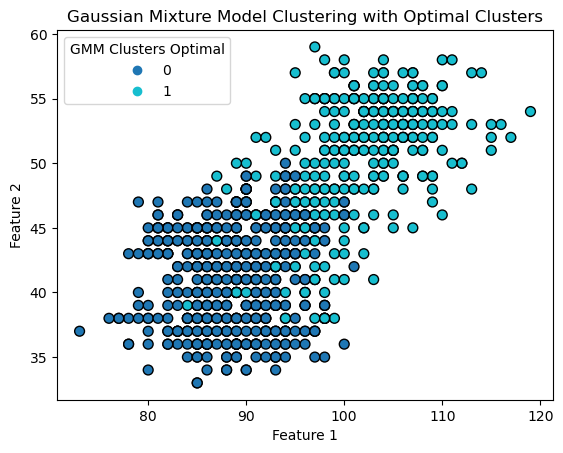

In [34]:
# Determine the optimal number of clusters using Gaussian Mixture Model (GMM)
num_clusters_range = range(2, 11)  # Adjust the range as needed
best_silhouette_score = -1
optimal_gmm_clusters = 2

for num_clusters in num_clusters_range:
    gmm = GaussianMixture(n_components=num_clusters, random_state=42)
    df["gmm_cluster"] = gmm.fit_predict(X)

    silhouette_avg = silhouette_score(X, df["gmm_cluster"])

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        optimal_gmm_clusters = num_clusters

# Apply GMM clustering with the optimal number of clusters
gmm = GaussianMixture(n_components=optimal_gmm_clusters, random_state=42)
df["gmm_cluster_optimal"] = gmm.fit_predict(X)

# Visualize the clusters with a scatter plot
scatter_gmm_optimal = plt.scatter(
    X[:, 0],
    X[:, 1],
    c=df["gmm_cluster_optimal"],
    cmap="tab10",
    edgecolor="k",
    s=50,
    label="GMM Cluster Optimal",
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Gaussian Mixture Model Clustering with Optimal Clusters")
plt.legend(*scatter_gmm_optimal.legend_elements(), title="GMM Clusters Optimal")
plt.show()

# Compare Clustering Methods


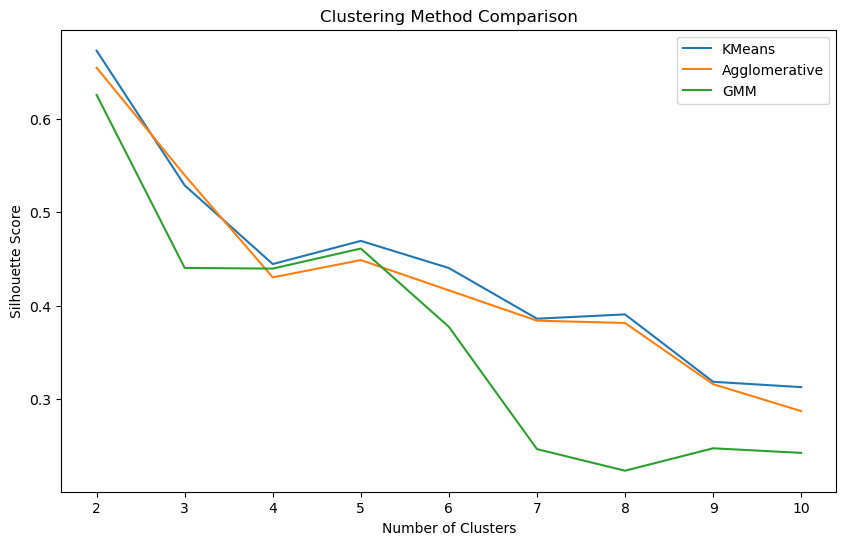

In [35]:
# Define a function for comparing clustering methods
def compare_clustering_methods(data, num_clusters_range):
    methods = ["KMeans", "Agglomerative", "GMM"]
    silhouette_scores = []

    # KMeans
    kmeans_scores = []
    for num_clusters in num_clusters_range:
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        data["kmeans_cluster"] = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, data["kmeans_cluster"])
        kmeans_scores.append(silhouette_avg)
    silhouette_scores.append(kmeans_scores)

    # Agglomerative
    agg_scores = []
    for num_clusters in num_clusters_range:
        agg = AgglomerativeClustering(n_clusters=num_clusters)
        data["agg_cluster"] = agg.fit_predict(X)
        silhouette_avg = silhouette_score(X, data["agg_cluster"])
        agg_scores.append(silhouette_avg)
    silhouette_scores.append(agg_scores)

    # Gaussian Mixture Model (GMM)
    gmm_scores = []
    for num_clusters in num_clusters_range:
        gmm = GaussianMixture(n_components=num_clusters, random_state=42)
        data["gmm_cluster"] = gmm.fit_predict(X)
        silhouette_avg = silhouette_score(X, data["gmm_cluster"])
        gmm_scores.append(silhouette_avg)
    silhouette_scores.append(gmm_scores)

    # Plot the results
    plt.figure(figsize=(10, 6))
    for i in range(3):
        plt.plot(num_clusters_range, silhouette_scores[i], label=methods[i])

    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.title("Clustering Method Comparison")
    plt.legend()
    plt.show()


# Set the range of clusters to compare
num_clusters_range = range(2, 11)  # Adjust the range as needed

# Call the function to compare clustering methods
compare_clustering_methods(df.copy(), num_clusters_range)

For sure KMeans perform better than the else.


# Clustering Analysis Report on Geometric Object Attributes

## Introduction

Clustering, an unsupervised machine learning approach, involves partitioning a dataset into distinct clusters or groups based on similarities among observations. This process aims to promote homogeneity within each group, revealing underlying patterns and relationships in the data. In this report, we explore different clustering methodologies and apply them to a dataset containing information about various geometric attributes of objects.

## Clustering Methodologies

### Hierarchical Clustering

Hierarchical clustering organizes observations into a hierarchical structure, creating a tree-like arrangement based on distance measures. This method provides insights into the relationships between different clusters within the dataset.

### Centroid-Based Clustering

Centroid-based clustering assigns observations to a predefined number of clusters (k) to minimize within-cluster variances. The widely used k-means clustering algorithm falls under this category, revealing compact groups of data points.

### Density-Based Clustering

Density-based clustering groups observations based on the density of closely packed points. Algorithms like DBSCAN and OPTICS excel in identifying clusters with varying densities, providing a flexible approach to pattern discovery.

### Distribution-Based Clustering

Distribution-based clustering relies on distribution models to group observations. The Gaussian Mixture Algorithm, for example, clusters objects based on the likelihood of belonging to the same distribution.

## Dataset Overview

The provided dataset includes information about geometric attributes of objects. Each row represents an object, and the columns contain measurements or characteristics associated with these objects. Key attributes include compactness, circularity, distance circularity, radius ratio, and various other geometric features.

### Object Attributes

- compactness: Measure of how compact the object is.
- circularity: Describes the circular shape of the object.
- distance_circularity: Indicates the distance-based circularity of the object.
- radius_ratio: Represents the ratio of the equivalent radius of the object.
- pr.axis_aspect_ratio: The aspect ratio of the principal axis.
- max.length_aspect_ratio: The aspect ratio of the maximum length.
- scatter_ratio: Describes the scatter of points around the major axis.
- elongatedness: Measures how elongated the object is.
- pr.axis_rectangularity: Describes the rectangularity of the principal axis.
- max.length_rectangularity: Describes the rectangularity of the maximum length.
- scaled_variance: Represents the scaled variance of the object.
- scaled_variance.1: Another measure of scaled variance.
- scaled_radius_of_gyration: Represents the scaled radius of gyration.
- scaled_radius_of_gyration.1: Another measure of scaled radius of gyration.
- skewness_about: Describes the skewness of the object.
- skewness_about.1: Another measure of skewness.
- skewness_about.2: Another measure related to skewness.
- hollows_ratio: Represents the ratio of areas between hollow and non-hollow parts of the object.

## Application of Clustering Methods

We apply hierarchical clustering, centroid-based clustering (k-means), and distribution-based clustering (Gaussian Mixture Algorithm) to the dataset, aiming to uncover inherent patterns and relationships within the geometric attributes of the objects.

## Evaluation Metrics

In the code, we utilize silhouette scores as a metric to evaluate the quality of clustering results. Silhouette scores measure how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Higher silhouette scores indicate better-defined clusters.

## Conclusion

Clustering analysis provides valuable insights into the structure of geometric object attributes, revealing patterns that may guide further exploration or targeted analyses. The diverse methodologies employed offer complementary perspectives on the dataset, contributing to a comprehensive understanding of its inherent characteristics. The use of silhouette scores enhances the quantitative assessment of clustering quality, aiding in the interpretation of results.
